In [1]:
#Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the CIFAR-100 dataset
cifar100 = keras.datasets.cifar100

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [4]:
# Display shapes of training and test datasets
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)


In [5]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

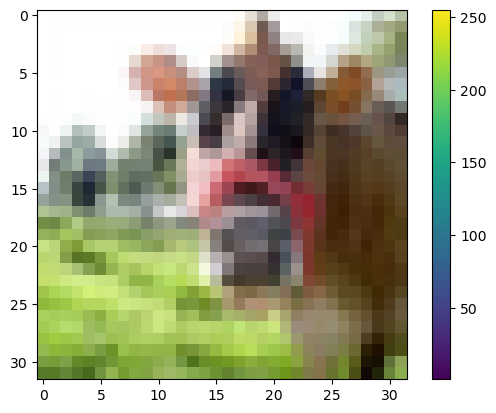

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [7]:
# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
class_names = np.array([
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
])


In [9]:
print(len(class_names))  # Should print 100 for CIFAR-100

100


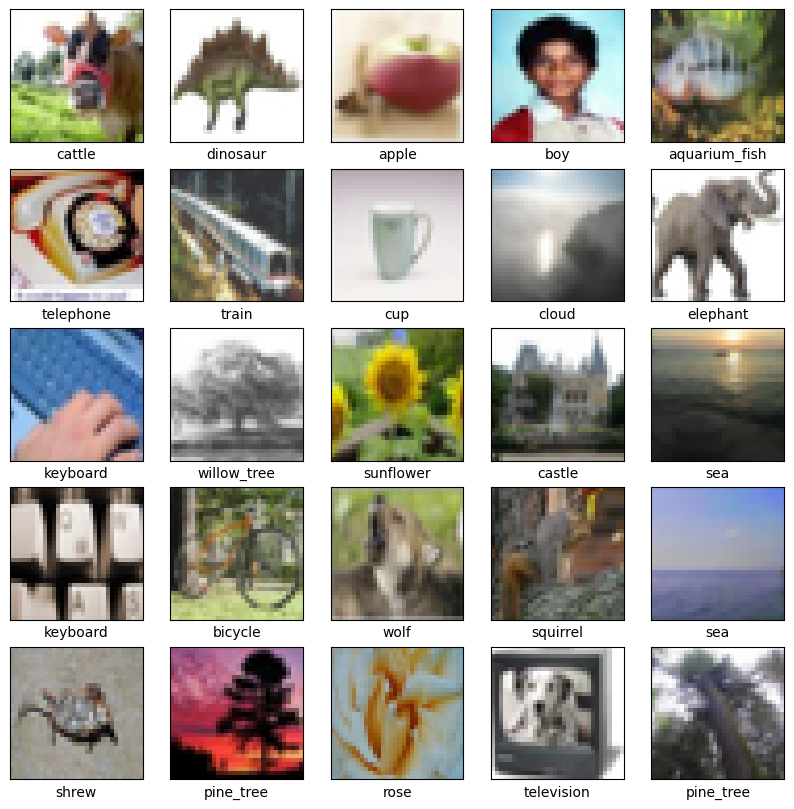

In [10]:
# Display a grid of 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])  # No need for cmap as images are in RGB
    label_index = train_labels[i][0]  # Convert 2D array to scalar
    plt.xlabel(class_names[label_index])  # Ensure label_index is within bounds
plt.show()

In [11]:
# Define the model
model = models.Sequential([
    # Convolutional layers
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

C:\Users\uzair\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
model.fit(train_images, train_labels, epochs=1000, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4161 - loss: 2.0957 - val_accuracy: 0.3387 - val_loss: 2.8271
Epoch 2/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4163 - loss: 2.0856 - val_accuracy: 0.3385 - val_loss: 2.8272
Epoch 3/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4202 - loss: 2.0740 - val_accuracy: 0.3411 - val_loss: 2.8491
Epoch 4/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4130 - loss: 2.0812 - val_accuracy: 0.3378 - val_loss: 2.8447
Epoch 5/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4198 - loss: 2.0617 - val_accuracy: 0.3393 - val_loss: 2.8553
Epoch 6/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.4183 - loss: 2.0613 - val_accuracy: 0.3431 - val_loss: 2.8812
Epoch 7/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4150 - loss: 2.0715 - val_accuracy: 0.3428 - val_loss: 2.8496
Epoch 8/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - ac

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4461 - loss: 1.8891 - val_accuracy: 0.3230 - val_loss: 3.6393
Epoch 98/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4507 - loss: 1.8767 - val_accuracy: 0.3201 - val_loss: 3.6255
Epoch 99/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4507 - loss: 1.8831 - val_accuracy: 0.3127 - val_loss: 3.5859
Epoch 100/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4509 - loss: 1.8686 - val_accuracy: 0.3136 - val_loss: 3.6356
Epoch 101/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.4472 - loss: 1.8966 - val_accuracy: 0.3187 - val_loss: 3.6460
Epoch 102/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4515 - loss: 1.8944 - val_accuracy: 0.3173 - val_loss: 3.6543
Epoch 103/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4613 - loss: 1.8547 - val_accuracy: 0.3188 - val_loss: 3.7049
Epoch 104/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - acc

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4526 - loss: 1.8771 - val_accuracy: 0.3023 - val_loss: 4.1960
Epoch 194/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4584 - loss: 1.8451 - val_accuracy: 0.3096 - val_loss: 4.2743
Epoch 195/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4533 - loss: 1.8596 - val_accuracy: 0.3007 - val_loss: 4.2494
Epoch 196/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4580 - loss: 1.8472 - val_accuracy: 0.3036 - val_loss: 4.1416
Epoch 197/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4575 - loss: 1.8868 - val_accuracy: 0.3060 - val_loss: 4.1713
Epoch 198/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4548 - loss: 1.8562 - val_accuracy: 0.3042 - val_loss: 4.1585
Epoch 199/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4592 - loss: 1.8483 - val_accuracy: 0.3028 - val_loss: 4.0701
Epoch 200/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - a

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4533 - loss: 1.8805 - val_accuracy: 0.3064 - val_loss: 4.3088
Epoch 290/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4511 - loss: 1.8798 - val_accuracy: 0.3030 - val_loss: 4.6487
Epoch 291/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4525 - loss: 1.8805 - val_accuracy: 0.2988 - val_loss: 4.5628
Epoch 292/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4546 - loss: 1.8698 - val_accuracy: 0.3011 - val_loss: 4.4002
Epoch 293/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4550 - loss: 1.8736 - val_accuracy: 0.2989 - val_loss: 4.7238
Epoch 294/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4543 - loss: 1.8684 - val_accuracy: 0.3007 - val_loss: 4.7593
Epoch 295/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4605 - loss: 1.8639 - val_accuracy: 0.2780 - val_loss: 4.2759
Epoch 296/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - a

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.4428 - loss: 1.9327 - val_accuracy: 0.2968 - val_loss: 4.7425
Epoch 386/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4366 - loss: 1.9710 - val_accuracy: 0.2980 - val_loss: 4.7941
Epoch 387/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.4476 - loss: 1.9131 - val_accuracy: 0.2913 - val_loss: 4.7399
Epoch 388/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.4351 - loss: 1.9697 - val_accuracy: 0.2836 - val_loss: 4.8019
Epoch 389/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4281 - loss: 2.0048 - val_accuracy: 0.2906 - val_loss: 4.9357
Epoch 390/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4409 - loss: 1.9563 - val_accuracy: 0.2963 - val_loss: 4.7542
Epoch 391/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4411 - loss: 1.9282 - val_accuracy: 0.2972 - val_loss: 4.6751
Epoch 392/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - a

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4240 - loss: 2.0364 - val_accuracy: 0.2920 - val_loss: 4.8067
Epoch 482/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4236 - loss: 2.0317 - val_accuracy: 0.2907 - val_loss: 5.2595
Epoch 483/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4285 - loss: 2.0095 - val_accuracy: 0.2965 - val_loss: 4.9885
Epoch 484/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4373 - loss: 1.9823 - val_accuracy: 0.2823 - val_loss: 4.6450
Epoch 485/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.4286 - loss: 2.0064 - val_accuracy: 0.3001 - val_loss: 5.2248
Epoch 486/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4238 - loss: 2.0319 - val_accuracy: 0.3012 - val_loss: 4.9596
Epoch 487/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4307 - loss: 2.0154 - val_accuracy: 0.2927 - val_loss: 4.9531
Epoch 488/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - a

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4053 - loss: 2.1416 - val_accuracy: 0.2958 - val_loss: 5.2149
Epoch 578/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4186 - loss: 2.0548 - val_accuracy: 0.2998 - val_loss: 5.2785
Epoch 579/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.4075 - loss: 2.1231 - val_accuracy: 0.2927 - val_loss: 4.8756
Epoch 580/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4101 - loss: 2.1146 - val_accuracy: 0.2995 - val_loss: 5.4646
Epoch 581/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4104 - loss: 2.1057 - val_accuracy: 0.3010 - val_loss: 5.2681
Epoch 582/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4046 - loss: 2.1485 - val_accuracy: 0.2915 - val_loss: 4.9323
Epoch 583/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4107 - loss: 2.1206 - val_accuracy: 0.2969 - val_loss: 5.1564
Epoch 584/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - a

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3823 - loss: 2.2531 - val_accuracy: 0.2884 - val_loss: 4.7731
Epoch 674/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3751 - loss: 2.2718 - val_accuracy: 0.2871 - val_loss: 4.6900
Epoch 675/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3874 - loss: 2.2226 - val_accuracy: 0.2902 - val_loss: 4.8621
Epoch 676/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3876 - loss: 2.2480 - val_accuracy: 0.2916 - val_loss: 5.7020
Epoch 677/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3891 - loss: 2.2328 - val_accuracy: 0.2958 - val_loss: 4.6323
Epoch 678/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3853 - loss: 2.2283 - val_accuracy: 0.2859 - val_loss: 4.8068
Epoch 679/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3929 - loss: 2.1845 - val_accuracy: 0.2892 - val_loss: 5.4415
Epoch 680/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - a

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3572 - loss: 2.4138 - val_accuracy: 0.2858 - val_loss: 4.6285
Epoch 770/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3713 - loss: 2.3196 - val_accuracy: 0.3038 - val_loss: 4.9139
Epoch 771/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3738 - loss: 2.3053 - val_accuracy: 0.2892 - val_loss: 4.7010
Epoch 772/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3522 - loss: 2.4546 - val_accuracy: 0.2924 - val_loss: 4.5760
Epoch 773/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3623 - loss: 2.3716 - val_accuracy: 0.2272 - val_loss: 7.4564
Epoch 774/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3292 - loss: 2.5739 - val_accuracy: 0.2753 - val_loss: 4.7674
Epoch 775/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3768 - loss: 2.2905 - val_accuracy: 0.2837 - val_loss: 4.6661
Epoch 776/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - a

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3380 - loss: 2.5121 - val_accuracy: 0.2927 - val_loss: 4.3206
Epoch 866/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3400 - loss: 2.5135 - val_accuracy: 0.2898 - val_loss: 4.2567
Epoch 867/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3286 - loss: 2.5600 - val_accuracy: 0.2933 - val_loss: 4.3212
Epoch 868/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3253 - loss: 2.5962 - val_accuracy: 0.2682 - val_loss: 3.7002
Epoch 869/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3391 - loss: 2.4897 - val_accuracy: 0.2802 - val_loss: 4.0222
Epoch 870/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3385 - loss: 2.5127 - val_accuracy: 0.3010 - val_loss: 4.9315
Epoch 871/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3335 - loss: 2.5220 - val_accuracy: 0.2931 - val_loss: 4.2426
Epoch 872/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - a

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2949 - loss: 2.7328 - val_accuracy: 0.2911 - val_loss: 4.3927
Epoch 962/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2987 - loss: 2.7345 - val_accuracy: 0.2838 - val_loss: 3.8405
Epoch 963/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2965 - loss: 2.6811 - val_accuracy: 0.2880 - val_loss: 4.4321
Epoch 964/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3139 - loss: 2.6399 - val_accuracy: 0.2795 - val_loss: 3.7040
Epoch 965/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.3019 - loss: 2.6913 - val_accuracy: 0.2747 - val_loss: 3.8747
Epoch 966/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3020 - loss: 2.6887 - val_accuracy: 0.2853 - val_loss: 3.8756
Epoch 967/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2935 - loss: 2.7594 - val_accuracy: 0.2853 - val_loss: 3.8578
Epoch 968/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - a

In [53]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size=32)
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2803 - loss: 4.1933
Test accuracy: 0.2802000045776367


In [54]:
# Make predictions
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [55]:
# Display shapes of test and predictions datasets
test_images.shape
predictions.shape

(10000, 100)

In [56]:
predictions[0]

array([0.0000000e+00, 7.4985606e-04, 3.1046648e-04, 1.1370609e-03,
       8.9304494e-03, 1.8260593e-02, 4.0928849e-34, 2.6248422e-04,
       4.1722862e-05, 1.3335135e-03, 2.8111197e-03, 1.6783768e-05,
       4.3699067e-02, 2.2067747e-12, 1.2781480e-05, 5.6640740e-05,
       2.3421889e-07, 3.6550919e-04, 2.4238732e-03, 1.5401301e-05,
       1.0115766e-05, 2.8459903e-05, 2.5617224e-03, 2.5849594e-02,
       1.5678502e-03, 1.4692066e-02, 3.9896807e-03, 5.9534829e-02,
       1.8841604e-03, 8.5765071e-04, 5.7078502e-03, 1.1184971e-04,
       6.6453911e-02, 2.2787288e-04, 6.6072877e-05, 2.0387892e-08,
       2.4286648e-05, 1.2902591e-03, 3.1997629e-03, 5.2195307e-02,
       4.1431846e-04, 1.7006967e-04, 3.4336004e-05, 3.5179045e-08,
       2.3319509e-02, 2.1369962e-04, 6.9734102e-07, 6.4153363e-09,
       1.1424428e-12, 1.7485637e-02, 2.4489777e-02, 9.4277075e-06,
       1.2186224e-12, 0.0000000e+00, 1.0564112e-24, 2.7904689e-02,
       3.1178625e-04, 4.9029649e-07, 1.0585728e-10, 6.2994566e

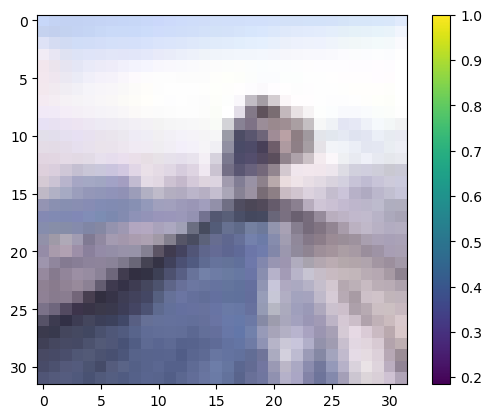

In [57]:
# Display an example test image (first image)
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

In [58]:
# Function to plot image with prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)  # No cmap since it's RGB
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label[0]]),  # Convert true_label to scalar
                color=color)

In [59]:
# Function to plot prediction probabilities
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(len(class_names)), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('green')  # Convert true_label to scalar

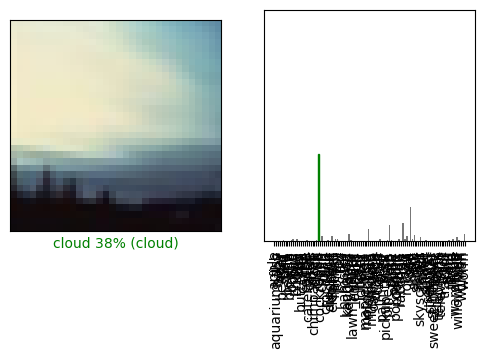

In [60]:
# Display predictions for a test image
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

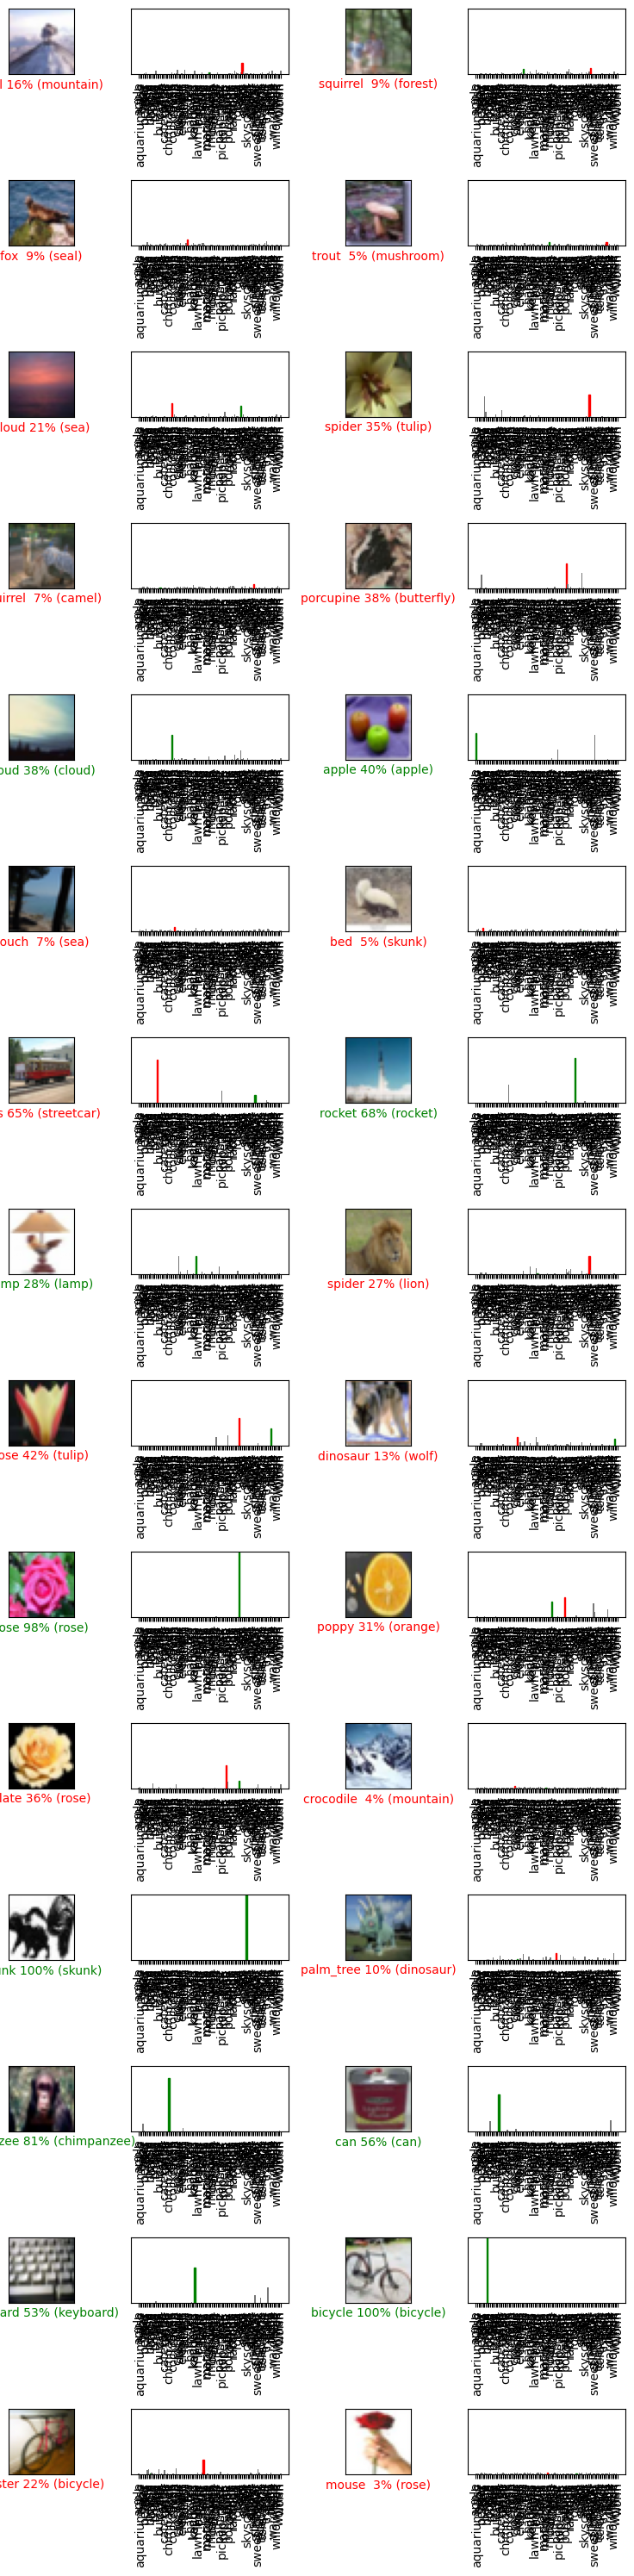

In [67]:
# Display predictions for multiple test images
rows = 15
cols = 2

num_images = rows*cols
plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):
    plt.subplot(rows, 2*cols, 2*i +1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(rows, 2*cols, 2*i +2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [70]:
img = test_images[8]
img.shape

(32, 32, 3)

In [71]:
img = (np.expand_dims(img, 0))
img.shape

(1, 32, 32, 3)

In [72]:
my_prediction = model.predict(img)
my_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.00000000e+00, 5.80968162e-08, 6.71261932e-06, 7.17401330e-04,
        2.30829319e-04, 4.17033629e-03, 1.26643923e-33, 2.12793439e-05,
        1.44861906e-06, 1.27045508e-03, 7.35056214e-03, 5.47628776e-10,
        7.31202448e-03, 3.48252888e-28, 3.51217039e-07, 4.85726673e-07,
        2.71751109e-04, 1.99164380e-03, 9.80369514e-04, 1.78947652e-04,
        7.25636375e-04, 1.04536815e-08, 3.65757989e-03, 3.76307875e-01,
        1.64837238e-05, 1.94469914e-02, 1.95353493e-07, 3.65101208e-04,
        4.77945432e-03, 9.25887491e-08, 2.18448322e-02, 3.31691204e-04,
        7.25650555e-03, 8.28668382e-03, 1.97834082e-09, 4.21887103e-09,
        5.54460975e-08, 1.94943597e-04, 8.36269901e-05, 2.94918045e-02,
        2.58015213e-03, 5.43411488e-07, 2.28039410e-09, 1.63927500e-11,
        6.83400367e-06, 3.35807970e-15, 8.06964454e-06, 4.31732268e-08,
        0.00000000e+00, 4.92852107e-02, 2.59777938e-04, 1.45862878e-05,
        1.76626108e-05, 0.00000000e+00, 2.63590227e-19, 7.412510

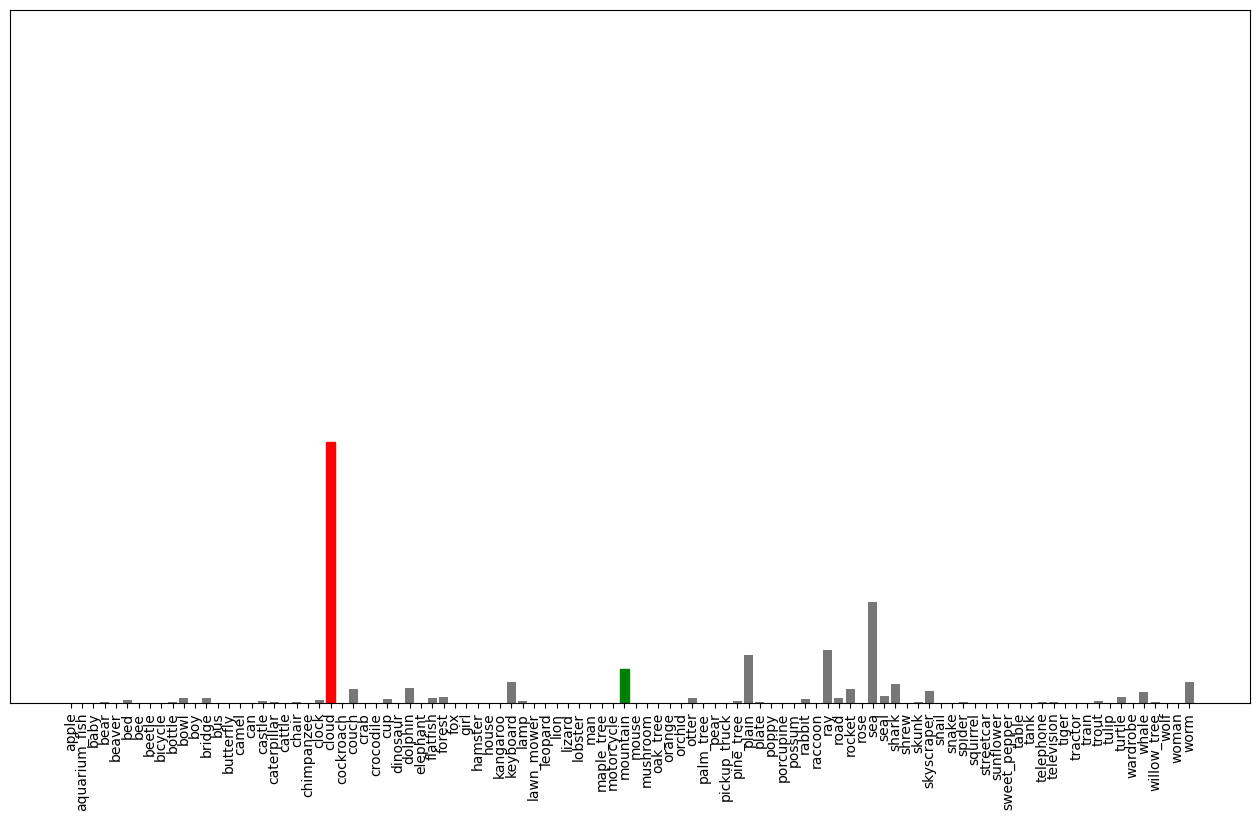

In [73]:
plt.figure(figsize=(16, 9))
plot_value_array(0, my_prediction[0], test_labels)
plt.xticks(range(len(class_names)), class_names, rotation=90)
plt.show()

In [74]:
# Save the model
model.save('model.keras')